In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


In [21]:
CLIENT_ID = 'XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH' # your Foursquare ID
CLIENT_SECRET = 'XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM' # your Foursquare Secret
VERSION = '20200217'
LIMIT = 500

In [22]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

In [28]:
address = 'Bronx, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.8466508 -73.8785937


In [42]:
search_query = 'Café'
radius = 1000

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&ll=40.8466508,-73.8785937&v=20200217&query=Café&radius=1000&limit=500'

In [43]:
results = requests.get(url).json()
results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
0,4bb648cef562ef3b3fea2f97,Morrone Pastry Shop & Cafe,"[{'id': '4bf58dd8d48988d1d0941735', 'name': 'D...",v-1581896699,False,2349 Arthur Ave,40.854636,-73.888400,"[{'label': 'display', 'lat': 40.85463575037460...",1213,10458,US,Bronx,NY,United States,"[2349 Arthur Ave, Bronx, NY 10458, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4c79d294278eb713f6a05580,Cafe al Mercato,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1581896699,False,2344 Arthur Ave,40.854176,-73.888085,"[{'label': 'display', 'lat': 40.85417649340613...",1157,10458,US,Bronx,NY,United States,"[2344 Arthur Ave, Bronx, NY 10458, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44941e38f964a52081341fe3,Arthur Avenue Cafe,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1581896699,False,2329 Arthur Ave,40.854068,-73.888838,"[{'label': 'display', 'lat': 40.85406831774407...",1194,10458,US,Bronx,NY,United States,"[2329 Arthur Ave (Crescent Avenue), Bronx, NY ...",Crescent Avenue,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4b8956c2f964a520d62c32e3,The Dancing Crane Cafe,"[{'id': '4bf58dd8d48988d14e941735', 'name': 'A...",v-1581896699,False,2300 Southern Blvd,40.849698,-73.880404,"[{'label': 'display', 'lat': 40.84969808989766...",371,10460,US,Bronx,NY,United States,"[2300 Southern Blvd (Bronx Zoo), Bronx, NY 104...",Bronx Zoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4c406ea5520fa5938000c8ac,Wild Asia Cafe,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",v-1581896699,False,NaN,40.845300,-73.877109,"[{'label': 'display', 'lat': 40.84530017553037...",195,10460,US,Bronx,NY,United States,"[Bronx, NY 10460, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4cc62765bde8f04db06eb54b,Picnic Cafe,"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",v-1581896699,False,NaN,40.849447,-73.880012,"[{'label': 'display', 'lat': 40.84944735766703...",333,10460,US,Bronx,NY,United States,"[Bronx, NY 10460, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4d39a9bacc48224b57ae354f,North Star Cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1581896699,False,850 E Tremont Ave,40.843336,-73.886982,"[{'label': 'display', 'lat': 40.84333558876738...",796,10460,US,Bronx,NY,United States,"[850 E Tremont Ave (Corner of Marmion), Bronx,...",Corner of Marmion,298371,https://www.seamless.com/menu/north-star-cafe-...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
7,4fae70c1e4b021a2c00b6b2f,Terrace Cafe,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",v-1581896699,False,Bronx Zoo,40.851532,-73.880303,"[{'label': 'display', 'lat': 40.85153166966169...",562,10460,US,Bronx,NY,United States,"[Bronx Zoo, Bronx, NY 10460, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4de194cec65b7a3e2106af4d,Havanna Cafe,"[{'id': '4bf58dd8d48988d154941735', 'name': 'C...",v-1581896699,False,NaN,40.839314,-73.882527,"[{'label': 'display', 'lat': 40.83931427825235...",881,NaN,US,NaN,New York,United States,"[New York, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4f326c6319836c91c7d663d8,Cafe Maggiolino,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",v-1581896699,False,2370 Belmont Ave,40.854217,-73.886500,"[{'label': 'display', 'lat': 40.854217, 'lng':...",1073,10458,US,Bronx,NY,United States,"[2370 Belmont Ave, Bronx, NY 10458, United Sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
0,Morrone Pastry Shop & Cafe,Dessert Shop,2349 Arthur Ave,40.854636,-73.888400,"[{'label': 'display', 'lat': 40.85463575037460...",1213,10458,US,Bronx,NY,United States,"[2349 Arthur Ave, Bronx, NY 10458, United States]",NaN,4bb648cef562ef3b3fea2f97
1,Cafe al Mercato,Italian Restaurant,2344 Arthur Ave,40.854176,-73.888085,"[{'label': 'display', 'lat': 40.85417649340613...",1157,10458,US,Bronx,NY,United States,"[2344 Arthur Ave, Bronx, NY 10458, United States]",NaN,4c79d294278eb713f6a05580
2,Arthur Avenue Cafe,Italian Restaurant,2329 Arthur Ave,40.854068,-73.888838,"[{'label': 'display', 'lat': 40.85406831774407...",1194,10458,US,Bronx,NY,United States,"[2329 Arthur Ave (Crescent Avenue), Bronx, NY ...",Crescent Avenue,44941e38f964a52081341fe3
3,The Dancing Crane Cafe,American Restaurant,2300 Southern Blvd,40.849698,-73.880404,"[{'label': 'display', 'lat': 40.84969808989766...",371,10460,US,Bronx,NY,United States,"[2300 Southern Blvd (Bronx Zoo), Bronx, NY 104...",Bronx Zoo,4b8956c2f964a520d62c32e3
4,Wild Asia Cafe,Fast Food Restaurant,NaN,40.845300,-73.877109,"[{'label': 'display', 'lat': 40.84530017553037...",195,10460,US,Bronx,NY,United States,"[Bronx, NY 10460, United States]",NaN,4c406ea5520fa5938000c8ac
5,Picnic Cafe,French Restaurant,NaN,40.849447,-73.880012,"[{'label': 'display', 'lat': 40.84944735766703...",333,10460,US,Bronx,NY,United States,"[Bronx, NY 10460, United States]",NaN,4cc62765bde8f04db06eb54b
6,North Star Cafe,Café,850 E Tremont Ave,40.843336,-73.886982,"[{'label': 'display', 'lat': 40.84333558876738...",796,10460,US,Bronx,NY,United States,"[850 E Tremont Ave (Corner of Marmion), Bronx,...",Corner of Marmion,4d39a9bacc48224b57ae354f
7,Terrace Cafe,Café,Bronx Zoo,40.851532,-73.880303,"[{'label': 'display', 'lat': 40.85153166966169...",562,10460,US,Bronx,NY,United States,"[Bronx Zoo, Bronx, NY 10460, United States]",NaN,4fae70c1e4b021a2c00b6b2f
8,Havanna Cafe,Cuban Restaurant,NaN,40.839314,-73.882527,"[{'label': 'display', 'lat': 40.83931427825235...",881,NaN,US,NaN,New York,United States,"[New York, United States]",NaN,4de194cec65b7a3e2106af4d
9,Cafe Maggiolino,Coffee Shop,2370 Belmont Ave,40.854217,-73.886500,"[{'label': 'display', 'lat': 40.854217, 'lng':...",1073,10458,US,Bronx,NY,United States,"[2370 Belmont Ave, Bronx, NY 10458, United Sta...",NaN,4f326c6319836c91c7d663d8


In [45]:
dataframe_filtered.name

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Cafe al Mercato',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [49]:
export_csv = dataframe_filtered.to_csv(r'C:\Users\Barry\Desktop\projects\Coursera_Capstone\export_dataframe.csv', index = None, header=True)

In [50]:
venue_id = '4c79d294278eb713f6a05580' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4c79d294278eb713f6a05580?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [51]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'hours', 'popular', 'pageUpdates', 'inbox', 'parent', 'hierarchy', 'attributes', 'bestPhoto', 'colors'])


{'id': '4c79d294278eb713f6a05580',
 'name': 'Cafe al Mercato',
 'contact': {'phone': '7183647681', 'formattedPhone': '(718) 364-7681'},
 'location': {'address': '2344 Arthur Ave',
  'lat': 40.85417649340613,
  'lng': -73.88808455700543,
  'labeledLatLngs': [{'label': 'display',
    'lat': 40.85417649340613,
    'lng': -73.88808455700543}],
  'postalCode': '10458',
  'cc': 'US',
  'city': 'Bronx',
  'state': 'NY',
  'country': 'United States',
  'formattedAddress': ['2344 Arthur Ave', 'Bronx, NY 10458', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/cafe-al-mercato/4c79d294278eb713f6a05580',
 'categories': [{'id': '4bf58dd8d48988d110941735',
   'name': 'Italian Restaurant',
   'pluralName': 'Italian Restaurants',
   'shortName': 'Italian',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 5},
 'price': {'tier': 2, 'message': 'Moderate', 'currency': '$'},
 'l

In [54]:
result['response']['venue']['rating']

8.1

In [55]:
result['response']['venue']['price']

{'tier': 2, 'message': 'Moderate', 'currency': '$'}

In [58]:
result['response']['venue']['hours']

{'status': 'Closed until 7:00 AM tomorrow',
 'richStatus': {'entities': [], 'text': 'Closed until 7:00 AM tomorrow'},
 'isOpen': False,
 'isLocalHoliday': False,
 'dayData': [],
 'timeframes': [{'days': 'Mon–Sat',
   'open': [{'renderedTime': '7:00 AM–5:30 PM'}],
   'segments': []}]}

In [59]:
venue_id = '4bb648cef562ef3b3fea2f97' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4bb648cef562ef3b3fea2f97?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [64]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.0


In [68]:
result['response']['venue']['price']

{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [69]:
venue_id = '44941e38f964a52081341fe3' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/44941e38f964a52081341fe3?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [70]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.9


In [71]:
result['response']['venue']['price']

{'tier': 2, 'message': 'Moderate', 'currency': '$'}

In [72]:
venue_id = '4b8956c2f964a520d62c32e3' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4b8956c2f964a520d62c32e3?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [73]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.4


In [74]:
result['response']['venue']['price']

{'tier': 2, 'message': 'Moderate', 'currency': '$'}

In [75]:
venue_id = '4c406ea5520fa5938000c8ac' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4c406ea5520fa5938000c8ac?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [76]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [77]:
result['response']['venue']['price']

{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [78]:
venue_id = '4cc62765bde8f04db06eb54b' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4cc62765bde8f04db06eb54b?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [79]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [80]:
result['response']['venue']['price']

{'tier': 3, 'message': 'Expensive', 'currency': '$'}

In [82]:
venue_id = '4d39a9bacc48224b57ae354f' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4d39a9bacc48224b57ae354f?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [83]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.4


In [84]:
result['response']['venue']['price']

{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [85]:
venue_id = '4fae70c1e4b021a2c00b6b2f' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4fae70c1e4b021a2c00b6b2f?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [86]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.7


In [87]:
result['response']['venue']['price']

{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [88]:
venue_id = '4de194cec65b7a3e2106af4d' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4de194cec65b7a3e2106af4d?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [89]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [90]:
result['response']['venue']['price']

{'tier': 2, 'message': 'Moderate', 'currency': '$'}

In [91]:
venue_id = '4f326c6319836c91c7d663d8' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4f326c6319836c91c7d663d8?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [92]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [93]:
result['response']['venue']['price']

{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [94]:
venue_id = '4ef56f65a69dea74f915b704' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4ef56f65a69dea74f915b704?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [95]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.8


In [96]:
result['response']['venue']['price']

{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [97]:
venue_id = '4bf033acc601a593b167c3d1' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4bf033acc601a593b167c3d1?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [98]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [99]:
result['response']['venue']['price']

{'tier': 1, 'message': 'Cheap', 'currency': '$'}

In [100]:
venue_id = '4492ad65f964a52075341fe3' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4492ad65f964a52075341fe3?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [101]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

9.0


In [103]:
try:
    print(result['response']['venue']['price'])
except:
    print('This venue has not been priced yet.')

This venue has not been priced yet.


In [104]:
venue_id = '4492ad65f964a52075341fe3' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4492ad65f964a52075341fe3?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [105]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

9.0


In [106]:
try:
    print(result['response']['venue']['price'])
except:
    print('This venue has not been priced yet.')

This venue has not been priced yet.


In [107]:
venue_id = '4f32562519836c91c7cdbe48' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4f32562519836c91c7cdbe48?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [108]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [109]:
try:
    print(result['response']['venue']['price'])
except:
    print('This venue has not been priced yet.')

{'tier': 1, 'message': 'Cheap', 'currency': '$'}


In [110]:
venue_id = '4ebded449a52cce4f2b0e2c4' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4ebded449a52cce4f2b0e2c4?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [111]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [112]:
try:
    print(result['response']['venue']['price'])
except:
    print('This venue has not been priced yet.')

{'tier': 1, 'message': 'Cheap', 'currency': '$'}


In [113]:
venue_id = '50f8466ae4b0688fecd706d8' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/50f8466ae4b0688fecd706d8?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [114]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [115]:
try:
    print(result['response']['venue']['price'])
except:
    print('This venue has not been priced yet.')

{'tier': 1, 'message': 'Cheap', 'currency': '$'}


In [116]:
venue_id = '5264ce2e11d2d2fd2b3232e4' # ID of Harry's Italian Pizza Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/5264ce2e11d2d2fd2b3232e4?client_id=XWWKC4DCATGXLDLXCE2F3UATKKBSNBGEF2D4CCXWK1CRJDDH&client_secret=XXI0QDDDFEU3AKQLM1NKABJ5BDV04VJJC5CCZDVHN0E1UECM&v=20200217'

In [117]:
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [118]:
try:
    print(result['response']['venue']['price'])
except:
    print('This venue has not been priced yet.')

This venue has not been priced yet.


In [121]:
cafeshop = {'Name': ['Morrone Pastry Shop & Cafe',
'Cafe al Mercato',
'Arthur Avenue Cafe',
'The Dancing Crane Cafe',
'Wild Asia Cafe',
'Picnic Cafe',
'North Star Cafe',
'Terrace Cafe',
'Havanna Cafe',
'Cafe Maggiolino',
'Istanbul Cafe',
'Parisienne Cafe',
'Bronx Zoo',
'Cafe Lasalle',
'Laonda Cafe',
'Jerusalem cafe',
'Karied Mexican deli cafe',
'Sunkofa Cafe & Juice Bar'], 'Rating': [8,
8.1,
5.9,
5.4,
-1,
-1,
8.4,
5.7,
-1,
-1,
6.8,
-1,
9,
9,
-1,
-1,
-1,
-1], 'Price': [1,
2,
2,
2,
1,
3,
1,
1,
2,
1,
1,
1,
-1,
-1,
1,
1,
1,
-1
]}

df = pd.DataFrame(cafeshop, columns= ['Name', 'Rating','Price'])
df

,Name,Rating,Price
0,Morrone Pastry Shop & Cafe,8.0,1
1,Cafe al Mercato,8.1,2
2,Arthur Avenue Cafe,5.9,2
3,The Dancing Crane Cafe,5.4,2
4,Wild Asia Cafe,-1.0,1
5,Picnic Cafe,-1.0,3
6,North Star Cafe,8.4,1
7,Terrace Cafe,5.7,1
8,Havanna Cafe,-1.0,2
9,Cafe Maggiolino,-1.0,1


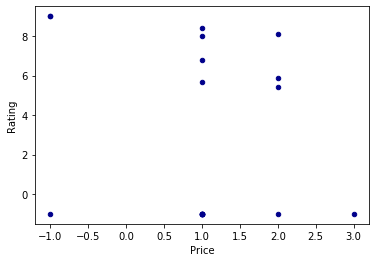

In [124]:
import matplotlib.pyplot as plt
cafe_scatter = df.plot.scatter(x='Price',
                      y='Rating',
                      c='DarkBlue')

cafe_scatter

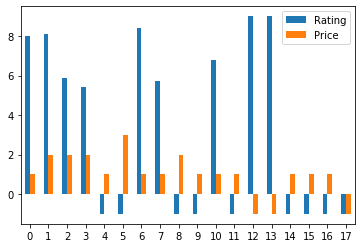

In [127]:
ax = df.plot.bar(rot=0)